In [1]:
%autosave 900 

Autosaving every 900 seconds


(The above changes autosave to every 15 minutes<a id = autosave_time>[1]</a>, since (following feedback from previous assignment) I have written a script which (when I remember to run it) forces a commit every time a file within the project directory is changed<a id = my_force_commit_script>[2]</a>, and a 2 minute autosave would be ridiculous.)

#### References

[1](#autosave_time): https://www.webucator.com/blog/2016/03/change-default-autosave-interval-in-ipython-notebook/

[2](#my_force_commit_script): https://stackoverflow.com/a/59121121/12462056

[3](#convert_to_csv): https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas

[4](#multiple_distplots): https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions

[5](#accessing_columns): https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/

[6](#show_legend): https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot

[7](#combinations): https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe

[8](#rounding): https://www.geeksforgeeks.org/round-function-python/

[9](#generating_random_data): https://towardsdatascience.com/understanding-the-normal-distribution-with-python-e70bb855b027





#### The Data
This data was downloaded from games archive on lichess.org (My_Games_Original in the project directory). The Data_Acquisition file in the project directory goes into further detail on my reasoning and processes for converting to this format. <a id = convert_to_csv>[3]</a>

In [2]:
import csv
import pandas as pd

fintan_games=pd.read_csv('My_Games', sep=",", header=None)
fintan_games.columns=['My_Colour', 'My_Result', 'Opponent_Rating', 'Time_Control', 'First_Move', 'Second_Move']

In [3]:
fintan_games.head(10)

,My_Colour,My_Result,Opponent_Rating,Time_Control,First_Move,Second_Move
0,Black,0,1906,180+0,d4,e5
1,Black,0,1956,180+0,d4,e5
2,White,1,1835,180+0,e4,d5
3,Black,1,1936,180+0,e4,e6
4,White,1,1868,180+0,e4,c5
5,White,1,1881,180+0,e4,b6
6,Black,1/2,1930,180+0,e4,e6
7,Black,0,1894,180+0,e4,e6
8,White,1/2,1934,180+0,e4,d5
9,White,0,1936,180+0,e4,Nc6


We shall also import some other packages.

In [4]:
import numpy as np
import numpy.random as npr
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter as cnt

#### Some Analysis

In [5]:
fintan_games.describe()

,Opponent_Rating
count,6250.000000
mean,1862.975200
std,103.970483
min,1182.000000
25%,1808.000000
50%,1861.000000
75%,1917.000000
max,2468.000000


So there are 6250 games in the dataset, and my opponents had a mean rating of 1863, ranging between 1182 and 2468. <a id ="accessing_columns">[5]</a>

In [6]:
for i in ['My_Colour','My_Result','Time_Control','First_Move','Second_Move']:
    print (cnt(fintan_games.iloc[:][i]),'\n')

Counter({'Black': 3308, 'White': 2942}) 

Counter({'1': 2993, '0': 2923, '1/2': 334}) 

Counter({'180+0': 4743, '180+2': 290, '300+0': 259, '240+0': 197, '180+1': 155, '180+3': 83, '300+2': 79, '120+2': 71, '420+0': 37, '300+3': 37, '240+2': 35, '120+3': 34, '60+3': 34, '300+1': 33, '300+4': 23, '360+0': 22, '240+1': 20, '180+5': 14, '0+5': 12, '180+4': 10, '240+3': 9, '60+5': 8, '60+4': 7, '240+4': 6, '120+5': 4, '360+2': 4, '45+4': 3, '120+4': 3, '420+1': 3, '120+8': 2, '60+7': 2, '60+8': 2, '0+9': 1, '60+6': 1, '240+5': 1, '0+10': 1, '30+4': 1, '120+7': 1, '360+1': 1, '30+6': 1, '60+9': 1}) 

Counter({'g4': 2565, 'e4': 2177, 'd4': 935, 'c4': 156, 'Nf3': 141, 'g3': 54, 'e3': 44, 'f4': 43, 'b3': 40, 'b4': 34, 'Nc3': 15, 'd3': 13, 'a4': 13, 'c3': 9, 'h3': 5, 'h4': 2, nan: 2, 'f3': 1, 'a3': 1}) 

Counter({'e6': 1906, 'e5': 1589, 'd5': 1336, 'c5': 434, 'd6': 180, 'Nf6': 171, 'g6': 160, 'c6': 143, 'b6': 122, 'Nc6': 64, 'h5': 54, 'f5': 42, 'g5': 12, 'a5': 9, 'b5': 8, 'a6': 6, 'h6': 6, 'f6'

So 3308 games as Black, 2942 as White (this is actually a little surprising over a sample of this size - I will assume an even distribution between the two), 2993 wins, 2923 losses and 334 draws. The vast majority of the games were 3 minutes a side, with a wide range of other time controls, most of which I don't ever remember playing.

Most of the games opened with g4 (this is not really a good opening move, so it might seem surprising, but it is was my opening of choice for short games for a very long time, as there are some nice traps). e4 is much more standard, and makes perfect sense. The rest of the distribution all seems pretty credible. There is a 'nan' which is annoying, but I will leave it in because it's good to see how they are dealt with/ignored. 

Black's moves seem unsurprising at first glance, and there are two 'nan's again, which presumably match up with those for the White moves.

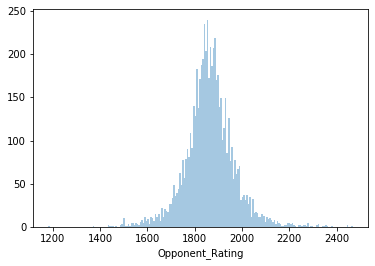

In [7]:
sb.distplot(fintan_games['Opponent_Rating'],kde=False,bins=200) 
plt.show()

The distribution appears normal with a mean of about 1850 (we saw earlier that the mean is 1864 with a standard distribution of 104).

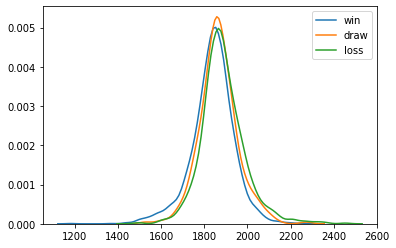

In [8]:
win=fintan_games.loc[(fintan_games['My_Result']=='1')]
draw=fintan_games.loc[fintan_games['My_Result']=='1/2']
loss=fintan_games.loc[fintan_games['My_Result']=='0']
sb.distplot(win[['Opponent_Rating']], hist=False, label='win')
sb.distplot(draw[['Opponent_Rating']], hist=False, label='draw')
sb.distplot(loss[['Opponent_Rating']], hist=False, label='loss')

plt.show()

This graph shows that, unsurprisingly, I win more games against lower-rated players, and lose more against higher-rated players. <a id = multiple_distplots>[4]</a> <a id = "combinations">[7]</a>

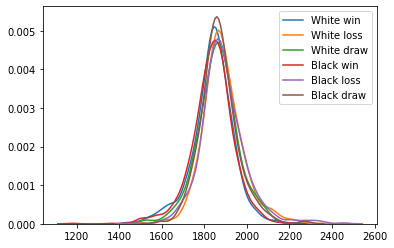

In [9]:
win_white=fintan_games.loc[(fintan_games['My_Result']=='1') & (fintan_games['My_Colour']=='White')]
win_black=fintan_games.loc[(fintan_games['My_Result']=='1') & (fintan_games['My_Colour']=='Black')]
loss_white=fintan_games.loc[(fintan_games['My_Result']=='0') & (fintan_games['My_Colour']=='White')]
loss_black=fintan_games.loc[(fintan_games['My_Result']=='0') & (fintan_games['My_Colour']=='Black')]
draw_white=fintan_games.loc[(fintan_games['My_Result']=='1/2') & (fintan_games['My_Colour']=='White')]
draw_black=fintan_games.loc[(fintan_games['My_Result']=='1/2') & (fintan_games['My_Colour']=='Black')]

sb.distplot(win_white[['Opponent_Rating']], hist=False, label='White win')
sb.distplot(loss_white[['Opponent_Rating']], hist=False, label='White loss')
sb.distplot(draw_white[['Opponent_Rating']], hist=False, label='White draw')
sb.distplot(win_black[['Opponent_Rating']], hist=False, label='Black win')
sb.distplot(loss_black[['Opponent_Rating']], hist=False, label='Black loss')
sb.distplot(draw_black[['Opponent_Rating']], hist=False, label='Black draw')

plt.show()

In [10]:
print(loss_white.mean())
print(loss_black.mean())
print(win_white.mean())
print(win_black.mean())



Opponent_Rating    1887.244977
dtype: float64
Opponent_Rating    1886.985881
dtype: float64
Opponent_Rating    1839.920105
dtype: float64
Opponent_Rating    1838.069577
dtype: float64


There is nothing tremendously exciting here. Now I will look only at games with the 1.g4 opening, so see if there is anything noteworthy there. <a id ='show_legend'>[6]</a>

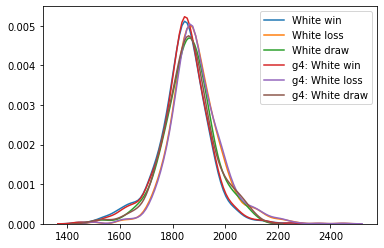

In [11]:
win_white_g4=fintan_games.loc[(fintan_games['My_Result']=='1') & (fintan_games['My_Colour']=='White') & (fintan_games['First_Move']=='g4')]
loss_white_g4=fintan_games.loc[(fintan_games['My_Result']=='0') & (fintan_games['My_Colour']=='White') & (fintan_games['First_Move']=='g4')]
draw_white_g4=fintan_games.loc[(fintan_games['My_Result']=='1/2') & (fintan_games['My_Colour']=='White') & (fintan_games['First_Move']=='g4')]

sb.distplot(win_white[['Opponent_Rating']], hist=False, label='White win')
sb.distplot(loss_white[['Opponent_Rating']], hist=False, label='White loss')
sb.distplot(draw_white[['Opponent_Rating']], hist=False, label='White draw')
sb.distplot(win_white_g4[['Opponent_Rating']], hist=False, label='g4: White win')
sb.distplot(loss_white_g4[['Opponent_Rating']], hist=False, label='g4: White loss')
sb.distplot(draw_white_g4[['Opponent_Rating']], hist=False, label='g4: White draw')

plt.show()

Given that g4 starts made up the majority of my games, it is not unusual that they match very closely with the overall results. The next most common appears to be e4; let me examine that.

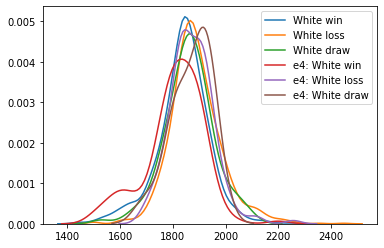

In [12]:
win_white_e4=fintan_games.loc[(fintan_games['My_Result']=='1') & (fintan_games['My_Colour']=='White') & (fintan_games['First_Move']=='e4')]
loss_white_e4=fintan_games.loc[(fintan_games['My_Result']=='0') & (fintan_games['My_Colour']=='White') & (fintan_games['First_Move']=='e4')]
draw_white_e4=fintan_games.loc[(fintan_games['My_Result']=='1/2') & (fintan_games['My_Colour']=='White') & (fintan_games['First_Move']=='e4')]

sb.distplot(win_white[['Opponent_Rating']], hist=False, label='White win')
sb.distplot(loss_white[['Opponent_Rating']], hist=False, label='White loss')
sb.distplot(draw_white[['Opponent_Rating']], hist=False, label='White draw')
sb.distplot(win_white_e4[['Opponent_Rating']], hist=False, label='e4: White win')
sb.distplot(loss_white_e4[['Opponent_Rating']], hist=False, label='e4: White loss')
sb.distplot(draw_white_e4[['Opponent_Rating']], hist=False, label='e4: White draw')

plt.show()

So playing e4 as White does not seem so good for me. Let me look at the responses to, say, g4.

First, let me see the options.

In [13]:
fg=fintan_games

print(cnt(fintan_games.loc[(fintan_games['First_Move']=='g4')]['Second_Move']))


Counter({'d5': 1182, 'e5': 377, 'c5': 200, 'e6': 178, 'd6': 155, 'g6': 127, 'c6': 107, 'b6': 70, 'Nc6': 48, 'h5': 47, 'Nf6': 33, 'g5': 12, 'f5': 8, 'h6': 5, 'a5': 5, 'f6': 4, 'a6': 4, 'b5': 2, 'Nh6': 1})


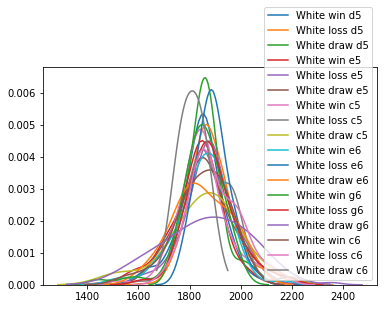

In [14]:
win_white_g4d5=fg.loc[(fg['My_Result']=='1') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='d5')]
loss_white_g4d5=fg.loc[(fg['My_Result']=='0') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='d5')]
draw_white_g4d5=fg.loc[(fg['My_Result']=='1/2') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='d5')]
sb.distplot(win_white_g4d5[['Opponent_Rating']], hist=False, label='White win d5')
sb.distplot(loss_white_g4d5[['Opponent_Rating']], hist=False, label='White loss d5')
sb.distplot(draw_white_g4d5[['Opponent_Rating']], hist=False, label='White draw d5')

win_white_g4e5=fg.loc[(fg['My_Result']=='1') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='e5')]
loss_white_g4e5=fg.loc[(fg['My_Result']=='0') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='e5')]
draw_white_g4e5=fg.loc[(fg['My_Result']=='1/2') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='e5')]
sb.distplot(win_white_g4e5[['Opponent_Rating']], hist=False, label='White win e5')
sb.distplot(loss_white_g4e5[['Opponent_Rating']], hist=False, label='White loss e5')
sb.distplot(draw_white_g4e5[['Opponent_Rating']], hist=False, label='White draw e5')

win_white_g4c5=fg.loc[(fg['My_Result']=='1') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='c5')]
loss_white_g4c5=fg.loc[(fg['My_Result']=='0') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='c5')]
draw_white_g4c5=fg.loc[(fg['My_Result']=='1/2') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='c5')]
sb.distplot(win_white_g4c5[['Opponent_Rating']], hist=False, label='White win c5')
sb.distplot(loss_white_g4c5[['Opponent_Rating']], hist=False, label='White loss c5')
sb.distplot(draw_white_g4c5[['Opponent_Rating']], hist=False, label='White draw c5')

win_white_g4e6=fg.loc[(fg['My_Result']=='1') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='e6')]
loss_white_g4e6=fg.loc[(fg['My_Result']=='0') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='e6')]
draw_white_g4e6=fg.loc[(fg['My_Result']=='1/2') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='e6')]
sb.distplot(win_white_g4e6[['Opponent_Rating']], hist=False, label='White win e6')
sb.distplot(loss_white_g4e6[['Opponent_Rating']], hist=False, label='White loss e6')
sb.distplot(draw_white_g4e6[['Opponent_Rating']], hist=False, label='White draw e6')

win_white_g4g6=fg.loc[(fg['My_Result']=='1') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='g6')]
loss_white_g4g6=fg.loc[(fg['My_Result']=='0') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='g6')]
draw_white_g4g6=fg.loc[(fg['My_Result']=='1/2') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='g6')]
sb.distplot(win_white_g4g6[['Opponent_Rating']], hist=False, label='White win g6')
sb.distplot(loss_white_g4g6[['Opponent_Rating']], hist=False, label='White loss g6')
sb.distplot(draw_white_g4g6[['Opponent_Rating']], hist=False, label='White draw g6')

win_white_g4c6=fg.loc[(fg['My_Result']=='1') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='c6')]
loss_white_g4c6=fg.loc[(fg['My_Result']=='0') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='c6')]
draw_white_g4c6=fg.loc[(fg['My_Result']=='1/2') & (fg['My_Colour']=='White') & (fg['First_Move']=='g4') & (fg['Second_Move']=='c6')]
sb.distplot(win_white_g4c6[['Opponent_Rating']], hist=False, label='White win c6')
sb.distplot(loss_white_g4c6[['Opponent_Rating']], hist=False, label='White loss c6')
sb.distplot(draw_white_g4c6[['Opponent_Rating']], hist=False, label='White draw c6')

plt.show()

In hindsight, preserving the rating change after each game would have been a more useful variable. Ah well, next time...

In [15]:
print(cnt(fg['First_Move']),'\n')
for i in cnt(fg['First_Move']):
    print(i)
    print(cnt(fintan_games.loc[(fintan_games['First_Move']==i)]['Second_Move']),'\n')

Counter({'g4': 2565, 'e4': 2177, 'd4': 935, 'c4': 156, 'Nf3': 141, 'g3': 54, 'e3': 44, 'f4': 43, 'b3': 40, 'b4': 34, 'Nc3': 15, 'd3': 13, 'a4': 13, 'c3': 9, 'h3': 5, 'h4': 2, nan: 2, 'f3': 1, 'a3': 1}) 

d4
Counter({'e5': 910, 'd5': 12, 'Nf6': 8, 'e6': 4, 'g6': 1}) 

e4
Counter({'e6': 1678, 'e5': 250, 'c5': 103, 'd5': 62, 'c6': 22, 'd6': 18, 'Nf6': 16, 'b6': 9, 'Nc6': 5, 'h5': 5, 'g6': 3, 'f5': 2, 'a6': 2, 'a5': 2}) 

f4
Counter({'f5': 31, 'e5': 5, 'b6': 2, 'e6': 2, 'd5': 2, 'a5': 1}) 

e3
Counter({'e6': 35, 'e5': 5, 'd5': 3, 'h5': 1}) 

g3
Counter({'g6': 28, 'd5': 10, 'e5': 8, 'c6': 3, 'e6': 1, 'd6': 1, 'Nc6': 1, 'b6': 1, 'b5': 1}) 

b3
Counter({'b6': 36, 'g6': 1, 'd5': 1, 'e5': 1, 'b5': 1}) 

Nf3
Counter({'Nf6': 101, 'd5': 34, 'e6': 4, 'e5': 1, 'Nc6': 1}) 

c4
Counter({'c5': 130, 'd5': 12, 'e5': 11, 'c6': 1, 'e6': 1, 'Nc6': 1}) 

g4
Counter({'d5': 1182, 'e5': 377, 'c5': 200, 'e6': 178, 'd6': 155, 'g6': 127, 'c6': 107, 'b6': 70, 'Nc6': 48, 'h5': 47, 'Nf6': 33, 'g5': 12, 'f5': 8, 'h6':

Of course, this counts both games where I am White and Black, and if I'm just looking to prepare against my opponents' first move, I need only look at games where I am Black. Somewhat interestingly, I note here that 19 of the possible 20 responses to g5 have been played, with only Na6 avoided entirely.

So, to look only at games where I played Black:

In [16]:
print(cnt(fg['First_Move']),'\n')
for i in cnt(fg['First_Move']):
    print(i)
    print(cnt(fg.loc[(fg['First_Move']==i) & (fg['My_Colour']=='Black')]['Second_Move']),'\n')

Counter({'g4': 2565, 'e4': 2177, 'd4': 935, 'c4': 156, 'Nf3': 141, 'g3': 54, 'e3': 44, 'f4': 43, 'b3': 40, 'b4': 34, 'Nc3': 15, 'd3': 13, 'a4': 13, 'c3': 9, 'h3': 5, 'h4': 2, nan: 2, 'f3': 1, 'a3': 1}) 

d4
Counter({'e5': 910, 'd5': 10, 'Nf6': 6, 'e6': 4, 'g6': 1}) 

e4
Counter({'e6': 1633, 'e5': 159, 'd5': 35, 'Nf6': 7, 'c5': 3, 'h5': 3, 'f5': 1, 'd6': 1, 'a5': 1}) 

f4
Counter({'f5': 31, 'e5': 5, 'b6': 2, 'e6': 2, 'd5': 2, 'a5': 1}) 

e3
Counter({'e6': 35, 'e5': 5, 'd5': 2, 'h5': 1}) 

g3
Counter({'g6': 28, 'd5': 6, 'e5': 6, 'b5': 1}) 

b3
Counter({'b6': 36, 'd5': 1, 'e5': 1, 'b5': 1}) 

Nf3
Counter({'Nf6': 101, 'd5': 33, 'e6': 4, 'e5': 1, 'Nc6': 1}) 

c4
Counter({'c5': 130, 'd5': 12, 'e5': 11, 'c6': 1, 'e6': 1, 'Nc6': 1}) 

g4
Counter({'d6': 3, 'Nc6': 2, 'c6': 1, 'd5': 1}) 

Nc3
Counter({'Nc6': 8, 'd5': 5, 'e5': 1, 'c5': 1}) 

b4
Counter({'Nf6': 9, 'b5': 3, 'd5': 2, 'e5': 2, 'b6': 1, 'e6': 1}) 

d3
Counter({'e5': 9, 'd6': 4}) 

f3
Counter({'f6': 1}) 

a3
Counter({'b5': 1}) 

c3
Coun

So, due to an interesting (to me) but perhaps unwisely chosen, or at least, unwisely reduced data set, there are no numerical correlation analyses to conduct. I guess I will simulate a normally distributed data set with mean 1863 and standard deviation of 104. I will randomly assign half each to Black and White, a Win:Draw:Loss ratio of about 30:29:3. Of the white openings (for me), about 5/6ths should be g4 (my opponents, being presumably sane, would no\t play it much). I'll let the other 1/6th be randomly selected, though this won't necessarily be strictly accurate. For games where I am black, I think I will just let both White's and Black's first moves be random, because there is nothing terribly interesting to be gleaned from them anyway. The time variable is boring, so I will ignore it entirely.



#### Generate a normally distributed data set 
with a mean of 1863 and a standard deviation of 104.<a id ="rounding">[8]</a>,<a id ="generating_random_data">[9]</a>

In [19]:
from scipy.stats import norm

mean_rating = 1863
std_devn_rating = 104

next_games = []
for i in range(1000):
    new_val=mean_rating + np.random.normal()*std_devn_rating
    next_games.append(round(new_val))

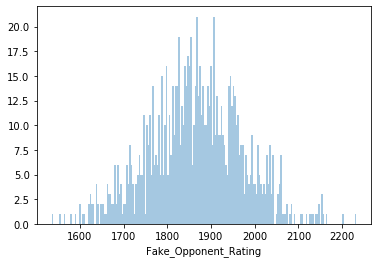

In [30]:
fake = pd.DataFrame(next_games, columns=['Fake_Opponent_Rating'])
sb.distplot(fake['Fake_Opponent_Rating'],kde=False,bins=200) 
plt.show()